In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

data = load_diabetes()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [ ]:
# Train Test Data Split
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


In [ ]:
# Preparing a Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print("Coeff: ", model.coef_)
print("Intercept: ", model.intercept_)

Coeff:  [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept:  151.34560453985995


In [ ]:
y_pred = model.predict(X_test)

print("Predictions:", y_pred[:5])
print("Actual values:", y_test.values[:5])


Predictions: [139.5475584  179.51720835 134.03875572 291.41702925 123.78965872]
Actual values: [219.  70. 202. 230. 111.]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 2900.193628493482
R^2 Score: 0.4526027629719195


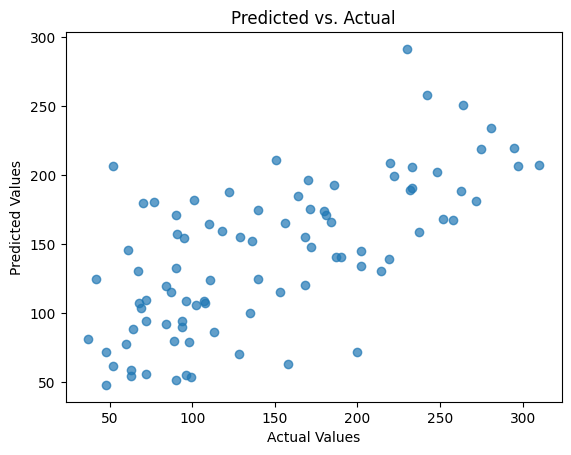

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual")
plt.show()
